In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read data from CSV file
data = pd.read_csv('startup_funding.csv')
df = data.copy()


# Print shape and head of the dataframe
print(df.shape)
df.head()

(2372, 10)


,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [4]:
# Check data types of the dataframe
df.dtypes

SNo                  int64
Date                object
StartupName         object
IndustryVertical    object
SubVertical         object
CityLocation        object
InvestorsName       object
InvestmentType      object
AmountInUSD         object
Remarks             object
dtype: object

In [5]:
# Clean the data
df = df[df['CityLocation'].notna()]
df = df[df['AmountInUSD'].notna()]
df['AmountInUSD'] = df['AmountInUSD'].str.replace(',', '').astype(float)
df['Date'] = df['Date'].str.replace(r'.', '/', regex=True)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', cache=False)


In [6]:
df['Date'] =  pd.to_datetime(df['Date'],format='%d/%m/%Y',cache=False)

In [7]:
# Check data types of the dataframe after cleaning
df.dtypes

SNo                          int64
Date                datetime64[ns]
StartupName                 object
IndustryVertical            object
SubVertical                 object
CityLocation                object
InvestorsName               object
InvestmentType              object
AmountInUSD                float64
Remarks                     object
dtype: object

In [8]:
# Checking the city names to help us to what code should be written to maintain the consistency in city names
sorted(df['CityLocation'].unique())

['Ahmedabad',
 'Bangalore',
 'Bangalore / Palo Alto',
 'Bangalore / SFO',
 'Bangalore / San Mateo',
 'Bangalore / USA',
 'Bangalore/ Bangkok',
 'Belgaum',
 'Bhopal',
 'Boston',
 'Chandigarh',
 'Chennai',
 'Coimbatore',
 'Dallas / Hyderabad',
 'Delhi',
 'Goa',
 'Gurgaon',
 'Gurgaon / SFO',
 'Gwalior',
 'Hyderabad',
 'Hyderabad/USA',
 'India / US',
 'Indore',
 'Jaipur',
 'Jodhpur',
 'Kanpur',
 'Kerala',
 'Kolkata',
 'Lucknow',
 'Missourie',
 'Mumbai',
 'Mumbai / Global',
 'Mumbai / NY',
 'Mumbai / UK',
 'New Delhi',
 'New Delhi / US',
 'New York/ India',
 'Noida',
 'Noida / Singapore',
 'Panaji',
 'Pune',
 'Pune / Dubai',
 'Pune / US',
 'Pune/Seattle',
 'SFO / Bangalore',
 'Singapore',
 'Trivandrum',
 'US/India',
 'USA/India',
 'Udupi',
 'Vadodara',
 'Varanasi']

In [9]:
# Replace city names for consistency
df['CityLocation'].replace('Delhi', 'New Delhi', inplace=True)
df['CityLocation'].replace('bangalore', 'Bangalore', inplace=True)

# Define a function to extract valid city names
def valid_city(city):
    city = str(city)
    if city != '':
        return city.split('/')[0].strip()
    
# Apply the function to the CityLocation column
df['CityLocation'] = df['CityLocation'].apply(valid_city)

In [10]:
# Sort and display unique city names to check the consistency after cleaning the data
sorted(df['CityLocation'].unique())

['Ahmedabad',
 'Bangalore',
 'Belgaum',
 'Bhopal',
 'Boston',
 'Chandigarh',
 'Chennai',
 'Coimbatore',
 'Dallas',
 'Goa',
 'Gurgaon',
 'Gwalior',
 'Hyderabad',
 'India',
 'Indore',
 'Jaipur',
 'Jodhpur',
 'Kanpur',
 'Kerala',
 'Kolkata',
 'Lucknow',
 'Missourie',
 'Mumbai',
 'New Delhi',
 'New York',
 'Noida',
 'Panaji',
 'Pune',
 'SFO',
 'Singapore',
 'Trivandrum',
 'US',
 'USA',
 'Udupi',
 'Vadodara',
 'Varanasi']

## 1.)
Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

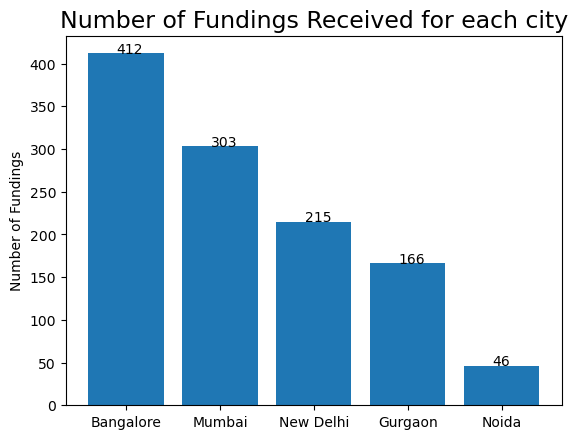

In [11]:
# Select data for specific cities as required
locations = ['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'New Delhi']
cities_no_of_fundings = df[df['CityLocation'].isin(locations)]['CityLocation']

# Count number of fundings for each city
fundings_data = cities_no_of_fundings.value_counts()

# Extract city names and number of fundings into arrays
city_names = np.array(fundings_data.index)
no_of_fundings = np.array(fundings_data.values)

# Create a bar chart of the data
plt.bar(city_names, no_of_fundings)
plt.ylabel('Number of Fundings')
plt.title('Number of Fundings Received for each city', fontsize=17)

# Add labels to the chart
cell_values = []
for i in fundings_data.values:
    cell_values.append(str(i))
    
# Define a function to input value labels in the chart
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i - 0.1, y[i] + 0.5, y[i])
        
addlabels(city_names, no_of_fundings)
plt.show()


## Bangalore City has received the most fundings so I would recommend Bangalore city to my friend to build his startup there

## 2.)
Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [13]:
# Select data with non-empty 'InvestorsName' column
df_new = data[data['InvestorsName'].notna()]

# Extract individual investor names and add to a list
investors = []
for row in df_new['InvestorsName']:
    for i in row.split(','):
        if 'undisclosed' not in i.lower() and i != "":
            investors.append(i.lower().strip())

In [14]:
# Count the number of investments made by each investor
dic = {}
for i in investors:
    if i != "":
        dic[i] = dic.get(i, 0) + 1
        
        
# Convert the data to a dataframe
investor_funding = pd.DataFrame(sorted(dic.items(), key=lambda kv: (kv[1], kv[0]), reverse=True),
                                columns=['Investor_Name', 'No_of_investments'])

In [15]:
# Find the top 5 Investor names
investor_funding.head()

,Investor_Name,No_of_investments
0,sequoia capital,64
1,accel partners,53
2,kalaari capital,44
3,saif partners,43
4,indian angel network,41


In [19]:
#Consider the top 5 investors and find whether there are any similar names to that so that we can replace them and have consistency

# Get investors with 'sequoia' in their name
seq = [i for i in set(investors) if 'sequoia' in i]
print('Investors like Sequoia - ')
print(seq)
print()

# Get investors with 'accel' in their name
accel = [i for i in set(investors) if 'accel' in i]
print('Investors like Accel ')
print(accel)
print()

# Get investors with 'kalaari' in their name
kalaari = [i for i in set(investors) if 'kalaari' in i]
print('Investors like Kalaari -')
print(kalaari)
print()

# Get investors with 'saif' in their name
saif = [i for i in set(investors) if 'saif' in i]
print('Investors like Saif -')
print(saif)
print()

# Get investors with 'indian angel' in their name
angel = [i for i in set(investors) if 'indian angel' in i]
print('Investors like Indian Angel -')
print(angel)


Investors like Sequoia - 
['sequoia india', 'sequoia capital india advisors', 'sequoia capital india and omidyar network', 'sequoia capital.', 'sequoia capital', 'sequoia and kalaari capital.', 'sequoia capital india', 'sequoia capital global equities']

Investors like Accel 
['accel us', 'iifl and accel partners', 'jaarvis accelerator', 'sands capital and accel partners', 'google capital & accel partners', 'green house ventures accelerator', 'ghv accelerator', 'kalaari capital accelerator program', 'centre for incubation & business acceleration (ciba)', 'accel partner', 'accel', 'accel partners rnt associates', 'accel partners', 'accel partners india', 'accel partners & others', 'accel india', 'hax accelerator', 'accel partners & existing investors']

Investors like Kalaari -
['kalaari capital and idg ventures india', 'kalaari capital accelerator program', 'kalaari capital partners', 'kalaari capital', 'sequoia and kalaari capital.', 'kalaari capital and inventus capital']

Investors 

In [20]:
# create a list of substrings to search for
substring_list = ['quoia', 'accel', 'alaari', 'saif', 'indian angel']

# create a list of corresponding replacements
replacement_list = ['sequoia capital', 'accel partners', 'kalaari capital', 'saif partners', 'indian angel network']

# loop through the substrings and replacements, and replace the investor names
for substring, replacement in zip(substring_list, replacement_list):
    # create a boolean mask to filter rows containing the substring
    mask = investor_funding['Investor_Name'].str.contains(substring, case=False) & \
           ~investor_funding['Investor_Name'].str.contains('and', case=False)
    
    # replace the investor names using the mask
    investor_funding.loc[mask, 'Investor_Name'] = replacement


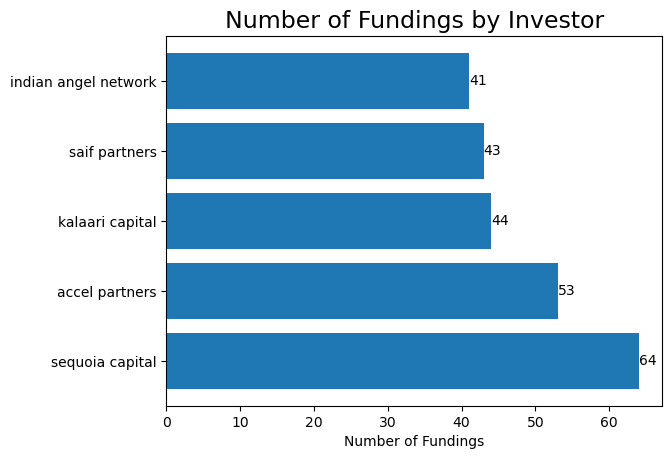

In [23]:
# create arrays for top 5 investors and number of investments
investor_names = np.array(investor_funding['Investor_Name'][:5])
no_of_fundings = np.array(investor_funding['No_of_investments'][:5])

# create a horizontal bar chart of top 5 investors

plt.barh(investor_names, no_of_fundings, align='center')
plt.xlabel('Number of Fundings')
plt.title('Number of Fundings by Investor',fontsize=17)
for i, v in enumerate(no_of_fundings):
    plt.text(v, i, str(v), color='black', va='center')
plt.show()


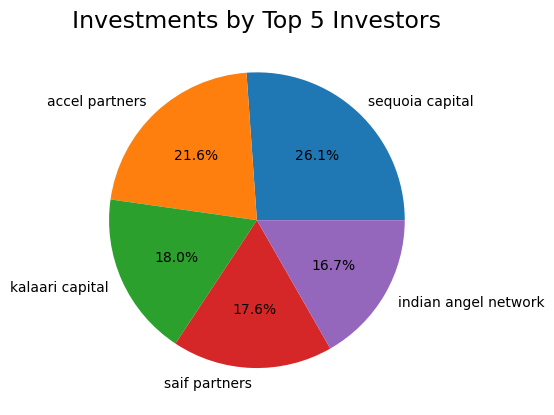

In [25]:
# create a pie chart of top 5 investors
plt.pie(no_of_investments, labels=investor_names, autopct='%1.1f%%')
plt.title('Investments by Top 5 Investors', fontsize=17)

plt.show()


## 3.)
After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [26]:
df_new = data[['InvestorsName', 'StartupName', 'InvestmentType']][data['InvestorsName'].notna() & data['InvestmentType'].notna()]

# Standardize startup names
startups = df_new['StartupName'].unique()
ola = [k for k in startups if 'Ola' in k]
for i in ola:
    df_new['StartupName'].replace(i, 'Ola', inplace=True)
df_new['StartupName'].replace('Flipkart.com', 'Flipkart', inplace=True)
oyo = [k for k in startups if 'Oyo' in k]
for i in oyo:
    df_new['StartupName'].replace(i, 'Oyo', inplace=True)
df_new['StartupName'].replace('Paytm Marketplace', 'Paytm', inplace=True)

# Create a dataframe of investors and startups
investors_data = pd.DataFrame(columns=['Investor_Name', 'StartupName'])
for row in df_new.index:
    for i in df_new['InvestorsName'][row].split(','):
        if 'undisclosed' not in i.lower():
            investors_data.loc[len(investors_data.index)] = [i.lower().strip(), df_new['StartupName'][row]]

# Standardize investor names
# create a list of substrings to search for
substring_list = ['quoia', 'accel', 'alaari', 'saif', 'indian angel']

# create a list of corresponding replacements
replacement_list = ['sequoia capital', 'accel partners', 'kalaari capital', 'saif partners', 'indian angel network']

# loop through the substrings and replacements, and replace the investor names
for substring, replacement in zip(substring_list, replacement_list):
    # create a boolean mask to filter rows containing the substring
    mask = investors_data['Investor_Name'].str.contains(substring, case=False) & \
           ~investors_data['Investor_Name'].str.contains('and', case=False)
    
    # replace the investor names using the mask
    investors_data.loc[mask, 'Investor_Name'] = replacement

investors_data.head()


,Investor_Name,StartupName
0,kae capital,TouchKin
1,triton investment advisors,Ethinos
2,kashyap deorah,Leverage Edu
3,anand sankeshwar,Leverage Edu
4,deepak jain,Leverage Edu


In [111]:
print(investors_data.shape)

(4436, 2)


(4436, 2)


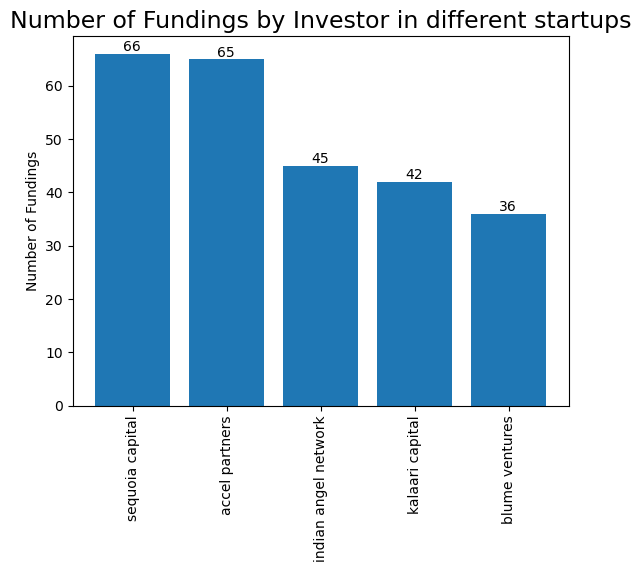

In [27]:
# Print the shape of the investors_data dataframe
print(investors_data.shape)

# Drop any duplicate values in the investors_data dataframe, keeping the first occurrence
investors_data.drop_duplicates(keep='first', inplace=True)

# Create a dictionary to count the number of investments made by each investor
dic = dict()
for i in investors_data['Investor_Name']:
    if i != "":
        dic[i] = dic.get(i, 0) + 1

# Create a new dataframe called investor_funding that contains the top 5 investors by number of investments
investor_funding = pd.DataFrame(sorted(dic.items(), key=lambda kv:(kv[1], kv[0]),reverse=True)[:5],
                                columns=['Investor_Name', 'No_of_investments'])

# Extract the investor names and number of investments as numpy arrays for plotting
investor_names = np.array(investor_funding['Investor_Name'])
no_of_fundings = np.array(investor_funding['No_of_investments'])

# Plot a bar chart of the number of investments made by each investor
plt.bar(investor_names, no_of_fundings)
plt.ylabel('Number of Fundings')
plt.title('Number of Fundings by Investor in different startups',fontsize=17)
plt.xticks(rotation=90)

# Add the number of investments as labels on top of each bar
cell_values = []
for i in no_of_fundings:
    cell_values.append(str(i))
addlabels(investor_names, no_of_fundings)

# Display the plot
plt.show()


## 4.)
Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [29]:
# Rename certain values in the 'InvestmentType' column
df_new['InvestmentType'].replace("PrivateEquity","Private Equity",inplace=True)
df_new['InvestmentType'].replace("SeedFunding","Seed Funding",inplace=True)
df_new['InvestmentType'].replace("Crowd funding","Crowd Funding",inplace=True)

# Create a new dataframe 'investors_data_new' with columns 'Investor_Name', 'StartupName', 'Invest_type'
investors_data_new = pd.DataFrame(columns=['Investor_Name','StartupName','Invest_type'])

# Loop through each row in the 'df_new' dataframe
for row in df_new.index:
    # Split the 'InvestorsName' column by ',' and loop through each investor name
    for i in df_new['InvestorsName'][row].split(','):
        # If the investor name does not contain the word 'undisclosed', add a new row to 'investors_data_new' with the investor name, startup name, and investment type
        if 'undisclosed' not in i.lower():
            investors_data_new.loc[len(investors_data_new.index)] = [i.lower().strip(),df_new['StartupName'][row],df_new['InvestmentType'][row]]
            
# Standardize investor names
# create a list of substrings to search for
substring_list = ['quoia', 'accel', 'alaari', 'saif', 'indian angel']

# create a list of corresponding replacements
replacement_list = ['sequoia capital', 'accel partners', 'kalaari capital', 'saif partners', 'indian angel network']

# loop through the substrings and replacements, and replace the investor names
for substring, replacement in zip(substring_list, replacement_list):
    # create a boolean mask to filter rows containing the substring
    mask = investors_data_new['Investor_Name'].str.contains(substring, case=False) & \
           ~investors_data_new['Investor_Name'].str.contains('and', case=False)
    
    # replace the investor names using the mask
    investors_data_new.loc[mask, 'Investor_Name'] = replacement
            
# Print the first few rows of the resulting dataframe
investors_data_new.head()


,Investor_Name,StartupName,Invest_type
0,kae capital,TouchKin,Private Equity
1,triton investment advisors,Ethinos,Private Equity
2,kashyap deorah,Leverage Edu,Seed Funding
3,anand sankeshwar,Leverage Edu,Seed Funding
4,deepak jain,Leverage Edu,Seed Funding


In [127]:
investors_data_new.shape

(4436, 3)

In [128]:
investors_data_new_seed_crowd = investors_data_new[investors_data_new['Invest_type'].isin(["Seed Funding","Crowd Funding"])][['Investor_Name','StartupName']]
print(investors_data_new_seed_crowd.shape)
investors_data_new_seed_crowd.head()

(2366, 2)


,Investor_Name,StartupName
2,kashyap deorah,Leverage Edu
3,anand sankeshwar,Leverage Edu
4,deepak jain,Leverage Edu
5,sadashiva nt,Leverage Edu
6,arjun mehta,Leverage Edu


(4436, 3)
(2366, 2)


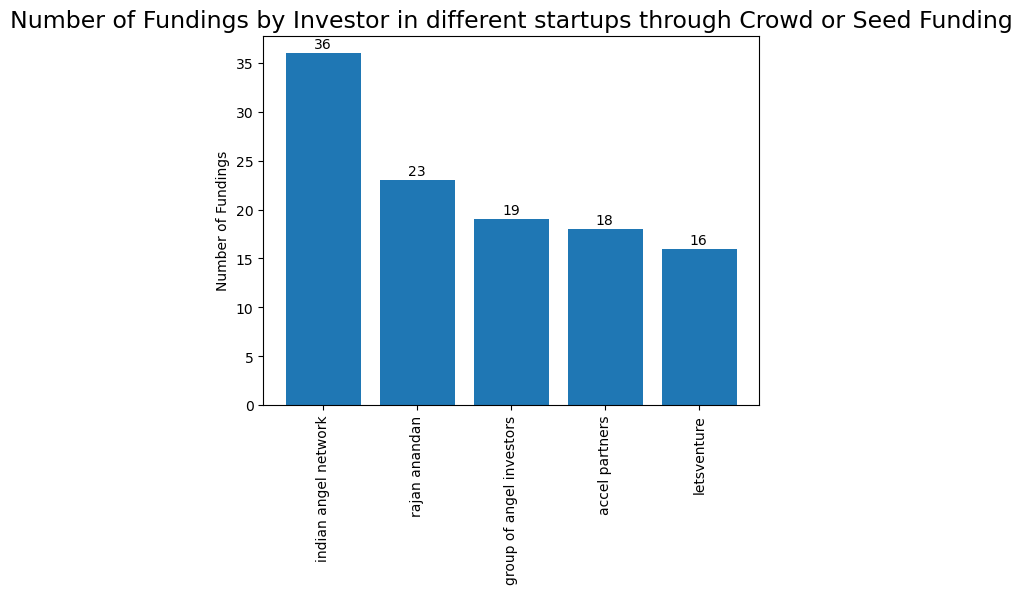

In [30]:
# Get the shape of the investors_data_new DataFrame
print(investors_data_new.shape)

# Create a new DataFrame to only include Seed Funding and Crowd Funding investments
investors_data_new_seed_crowd = investors_data_new[investors_data_new['Invest_type'].isin(["Seed Funding","Crowd Funding"])][['Investor_Name','StartupName']]
print(investors_data_new_seed_crowd.shape)
investors_data_new_seed_crowd.head()

# Drop any duplicate investor names in the new DataFrame
investors_data_new_seed_crowd.drop_duplicates(keep='first', inplace=True)

# Create a dictionary of investor names and the number of investments they've made
dic=dict()
for i in investors_data_new_seed_crowd['Investor_Name']:
    if i != "":
        dic[i]=dic.get(i,0)+1

# Create a DataFrame of the top 5 investors by number of investments
investor_funding = pd.DataFrame(sorted(dic.items(), key=lambda kv:(kv[1], kv[0]),reverse=True)[:5],
                                columns=['Investor_Name','No_of_investments'])

# Get the investor names and number of investments as NumPy arrays
investor_names = np.array(investor_funding['Investor_Name'])
no_of_fundings = np.array(investor_funding['No_of_investments'])

# Create a bar chart of the top 5 investors by number of investments
plt.bar(investor_names, no_of_fundings)
plt.ylabel('Number of Fundings')
plt.title('Number of Fundings by Investor in different startups through Crowd or Seed Funding', fontsize=17)
plt.xticks(rotation=90)
cell_values = []
for i in no_of_fundings:
    cell_values.append(str(i))
addlabels(investor_names, no_of_fundings)
plt.show()


## 5.)
Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [31]:
# Filter for Private Equity investments and select relevant columns
investors_data_new_private_fund = investors_data_new[investors_data_new['Invest_type'] == 'Private Equity'][['Investor_Name','StartupName']]
print(investors_data_new_private_fund.shape)
investors_data_new_private_fund.head()

(2069, 2)


,Investor_Name,StartupName
0,kae capital,TouchKin
1,triton investment advisors,Ethinos
16,infuse ventures,Ecolibriumenergy
17,jll,Ecolibriumenergy
18,asset management (asia) ltd,Droom


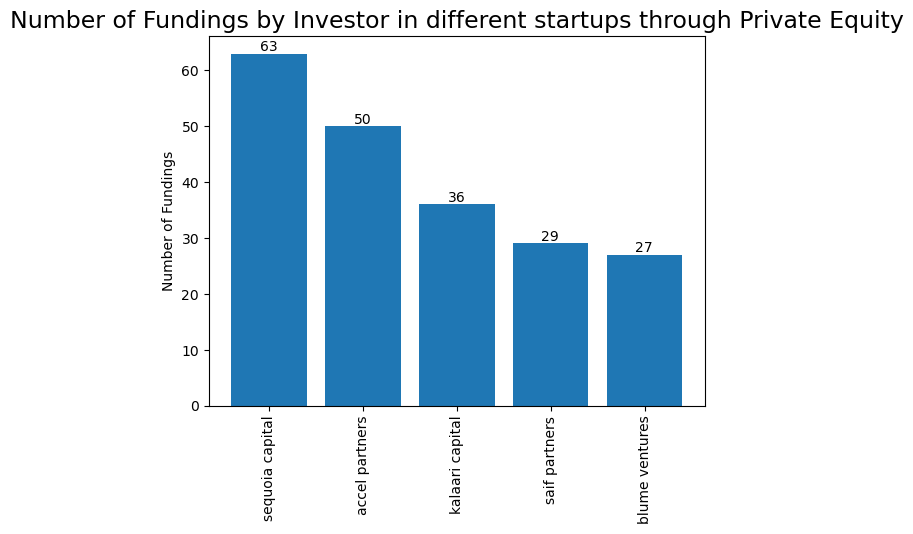

In [32]:
# Drop duplicates and count the number of investments per investor
investors_data_new_private_fund.drop_duplicates(keep='first', inplace=True)
dic = dict()
for i in investors_data_new_private_fund['Investor_Name']:
    if i != "":
        dic[i] = dic.get(i, 0) + 1
    
# Create a dataframe with the top 5 investors by number of investments
investor_funding = pd.DataFrame(sorted(dic.items(), key=lambda kv: (kv[1], kv[0]), reverse=True)[:5],
                                columns=['Investor_Name','No_of_investments'])

# Create arrays of investor names and number of investments for plotting
investor_names = np.array(investor_funding['Investor_Name'])
no_of_fundings = np.array(investor_funding['No_of_investments'])

# Plot the data
plt.bar(investor_names, no_of_fundings)
plt.ylabel('Number of Fundings')
plt.title('Number of Fundings by Investor in different startups through Private Equity', fontsize=17)
plt.xticks(rotation=90)

# Add labels to the bars
cell_values = []
for i in no_of_fundings:
    cell_values.append(str(i))
addlabels(investor_names, no_of_fundings)

# Show the plot
plt.show()


